# Student_grades_prediction



Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates
' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.



In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('Student_Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [39]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [40]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [41]:
df.drop(["Seat No."],axis=1,inplace=True)

In [42]:
df.shape

(571, 42)

In [43]:
df.isnull().sum() # checking the null values in each column

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [45]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [46]:
df.columns[0:41]

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns[0:41]:  
    df[column].fillna('NA', inplace=True) # fill the missing values with NA before encoding
    df[column] = le.fit_transform(df[column]) # Fit label encoder and transform grades

In [48]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


In [49]:
# again checking the null values
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [50]:
df.isnull().sum().sum()

0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int64  
 1   HS-101     571 non-null    int64  
 2   CY-105     571 non-null    int64  
 3   HS-105/12  571 non-null    int64  
 4   MT-111     571 non-null    int64  
 5   CS-105     571 non-null    int64  
 6   CS-106     571 non-null    int64  
 7   EL-102     571 non-null    int64  
 8   EE-119     571 non-null    int64  
 9   ME-107     571 non-null    int64  
 10  CS-107     571 non-null    int64  
 11  HS-205/20  571 non-null    int64  
 12  MT-222     571 non-null    int64  
 13  EE-222     571 non-null    int64  
 14  MT-224     571 non-null    int64  
 15  CS-210     571 non-null    int64  
 16  CS-211     571 non-null    int64  
 17  CS-203     571 non-null    int64  
 18  CS-214     571 non-null    int64  
 19  EE-217     571 non-null    int64  
 20  CS-212    

In [52]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: PH-121, dtype: int64


2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: HS-101, dtype: int64


0     177
2     120
4      50
3      49
5      42
9      31
1      31
6      19
7      17
8      16
10     14
13      3
12      1
11      1
Name: CY-105, dtype: int64


0     96
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
13     2
12     1
11     1
Name: HS-105/12, dtype: int64


2     105
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
13      3
12      2
11      2
Name: MT-111, dtype: int64


0     151
2     134
4      60
3      51
1      43
5      38
7      23
6      22
8      22
10     15
9      12
Name: CS-105, dtype: int64


2     116
4     101
3      96
0      56
5      54
7      41
10     29

In [53]:
# describe the dataset- give the satistical summary of numerical columns
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.924694,4.266200,3.936953,2.838879,4.161121,4.000000,3.919440,4.817863,...,4.267951,4.982487,3.663748,5.577933,4.479860,2.674256,4.084063,4.211909,4.437828,2.954888
std,3.046895,2.785317,3.003437,3.220967,3.039428,2.696709,2.774311,3.080784,2.693167,3.179170,...,3.502381,2.927134,3.128656,2.874352,3.995725,2.865834,2.656988,3.040475,3.815606,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


The datatype of all columns is object and CGPA is only Float datatype and also the label ... so no need to remove the outliers and skewness from the dataset.
beause all the grades are the important data.. we can't loss the data.


# Data Visualization

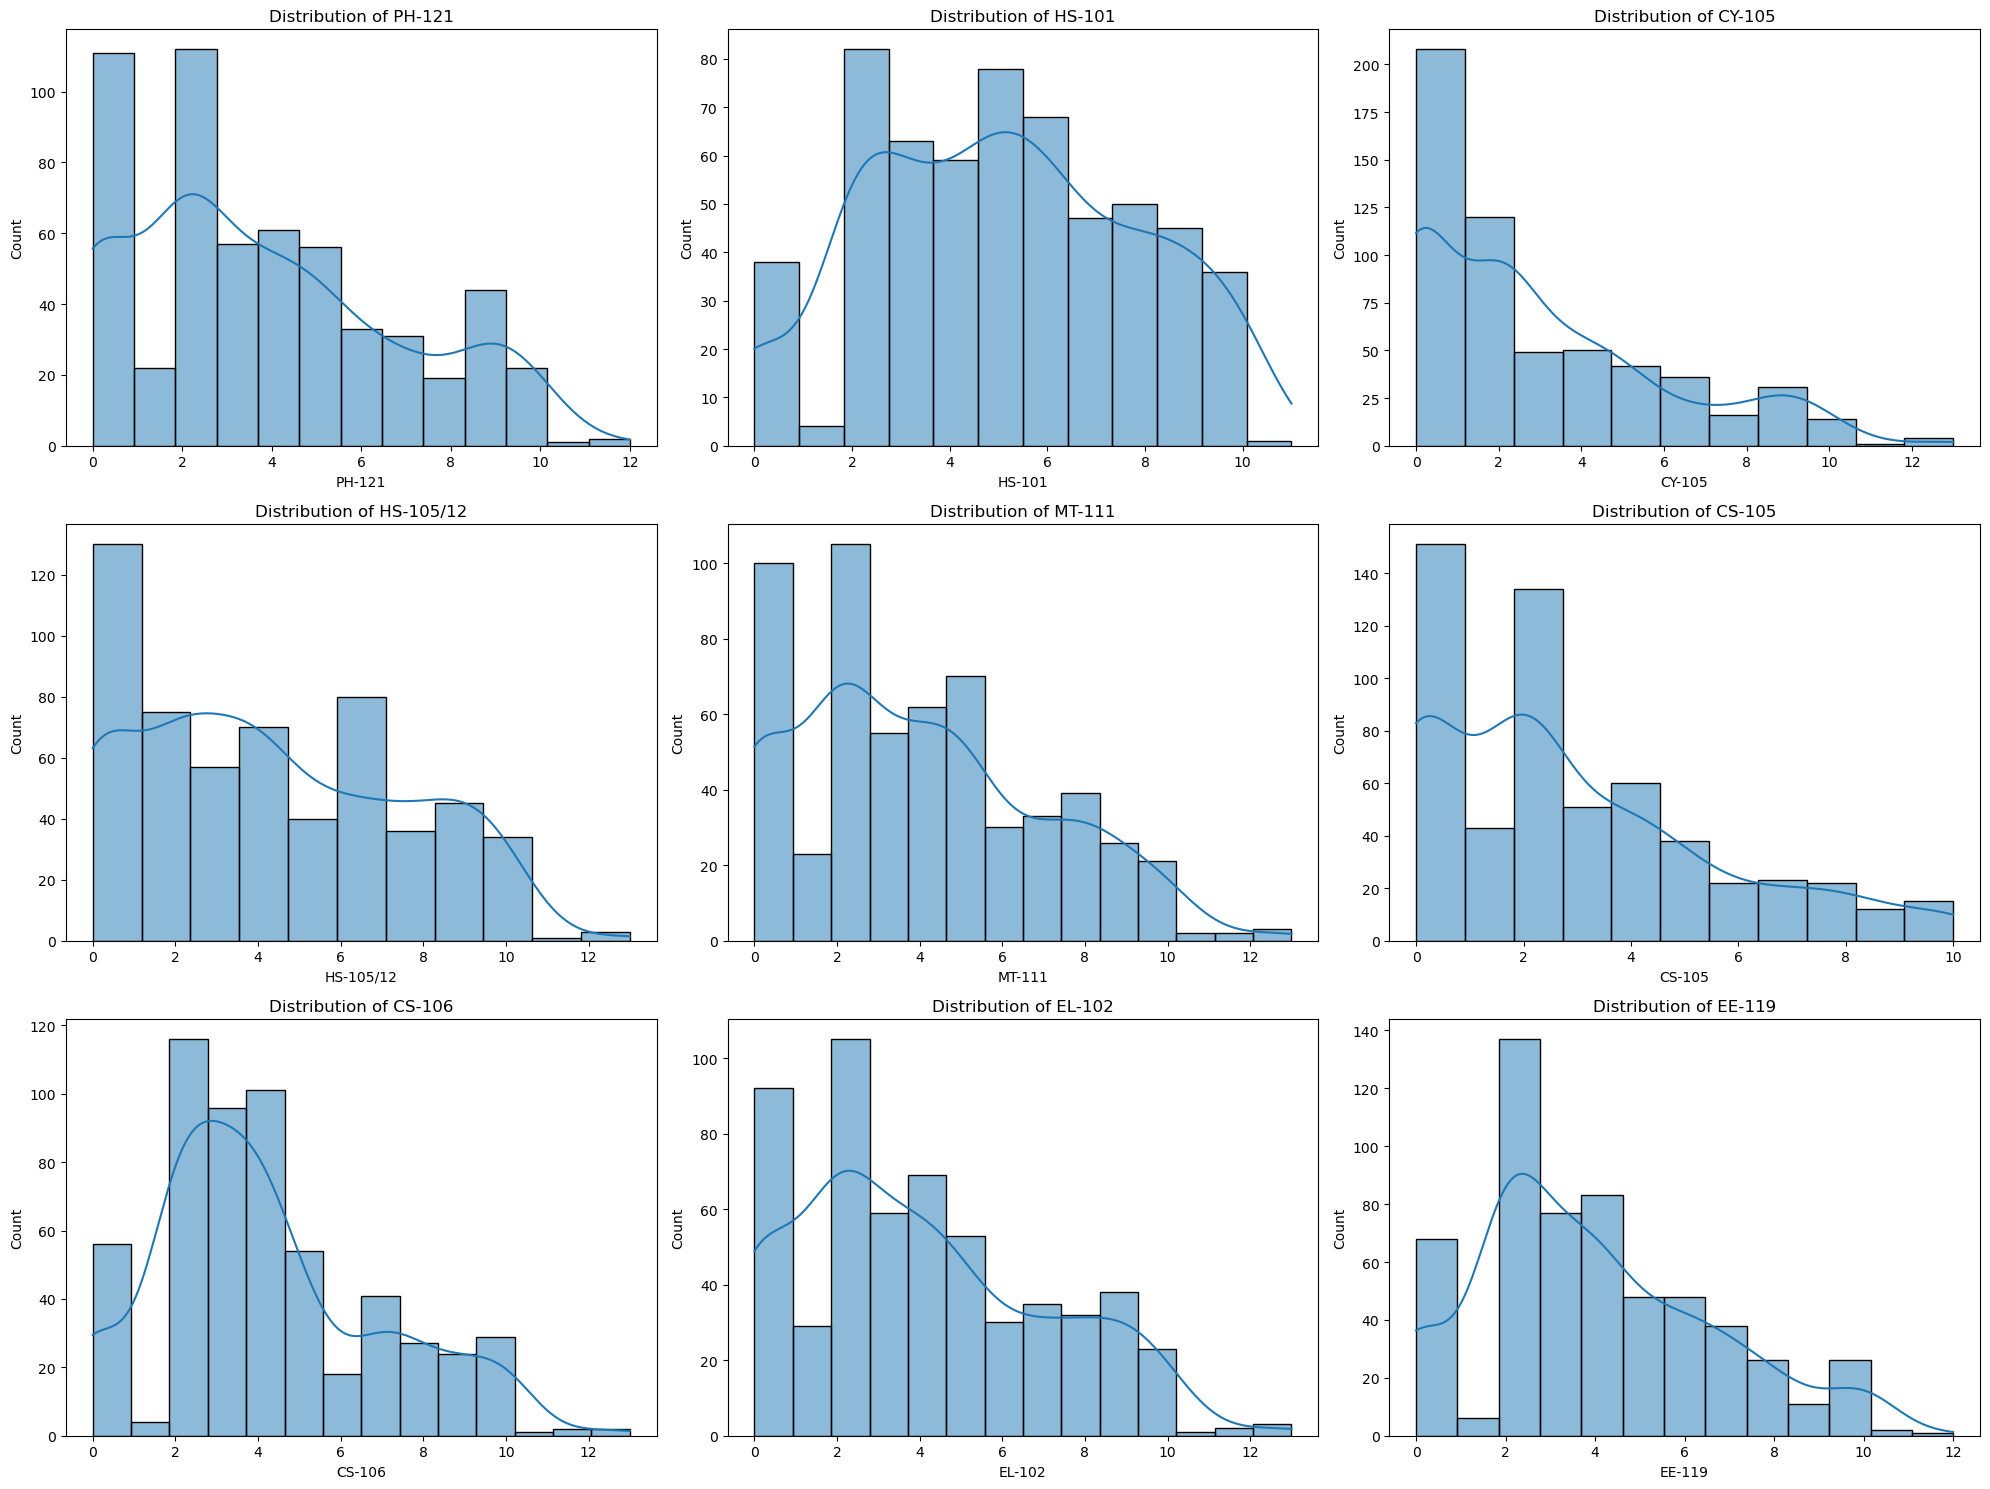

In [54]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns[0:9]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

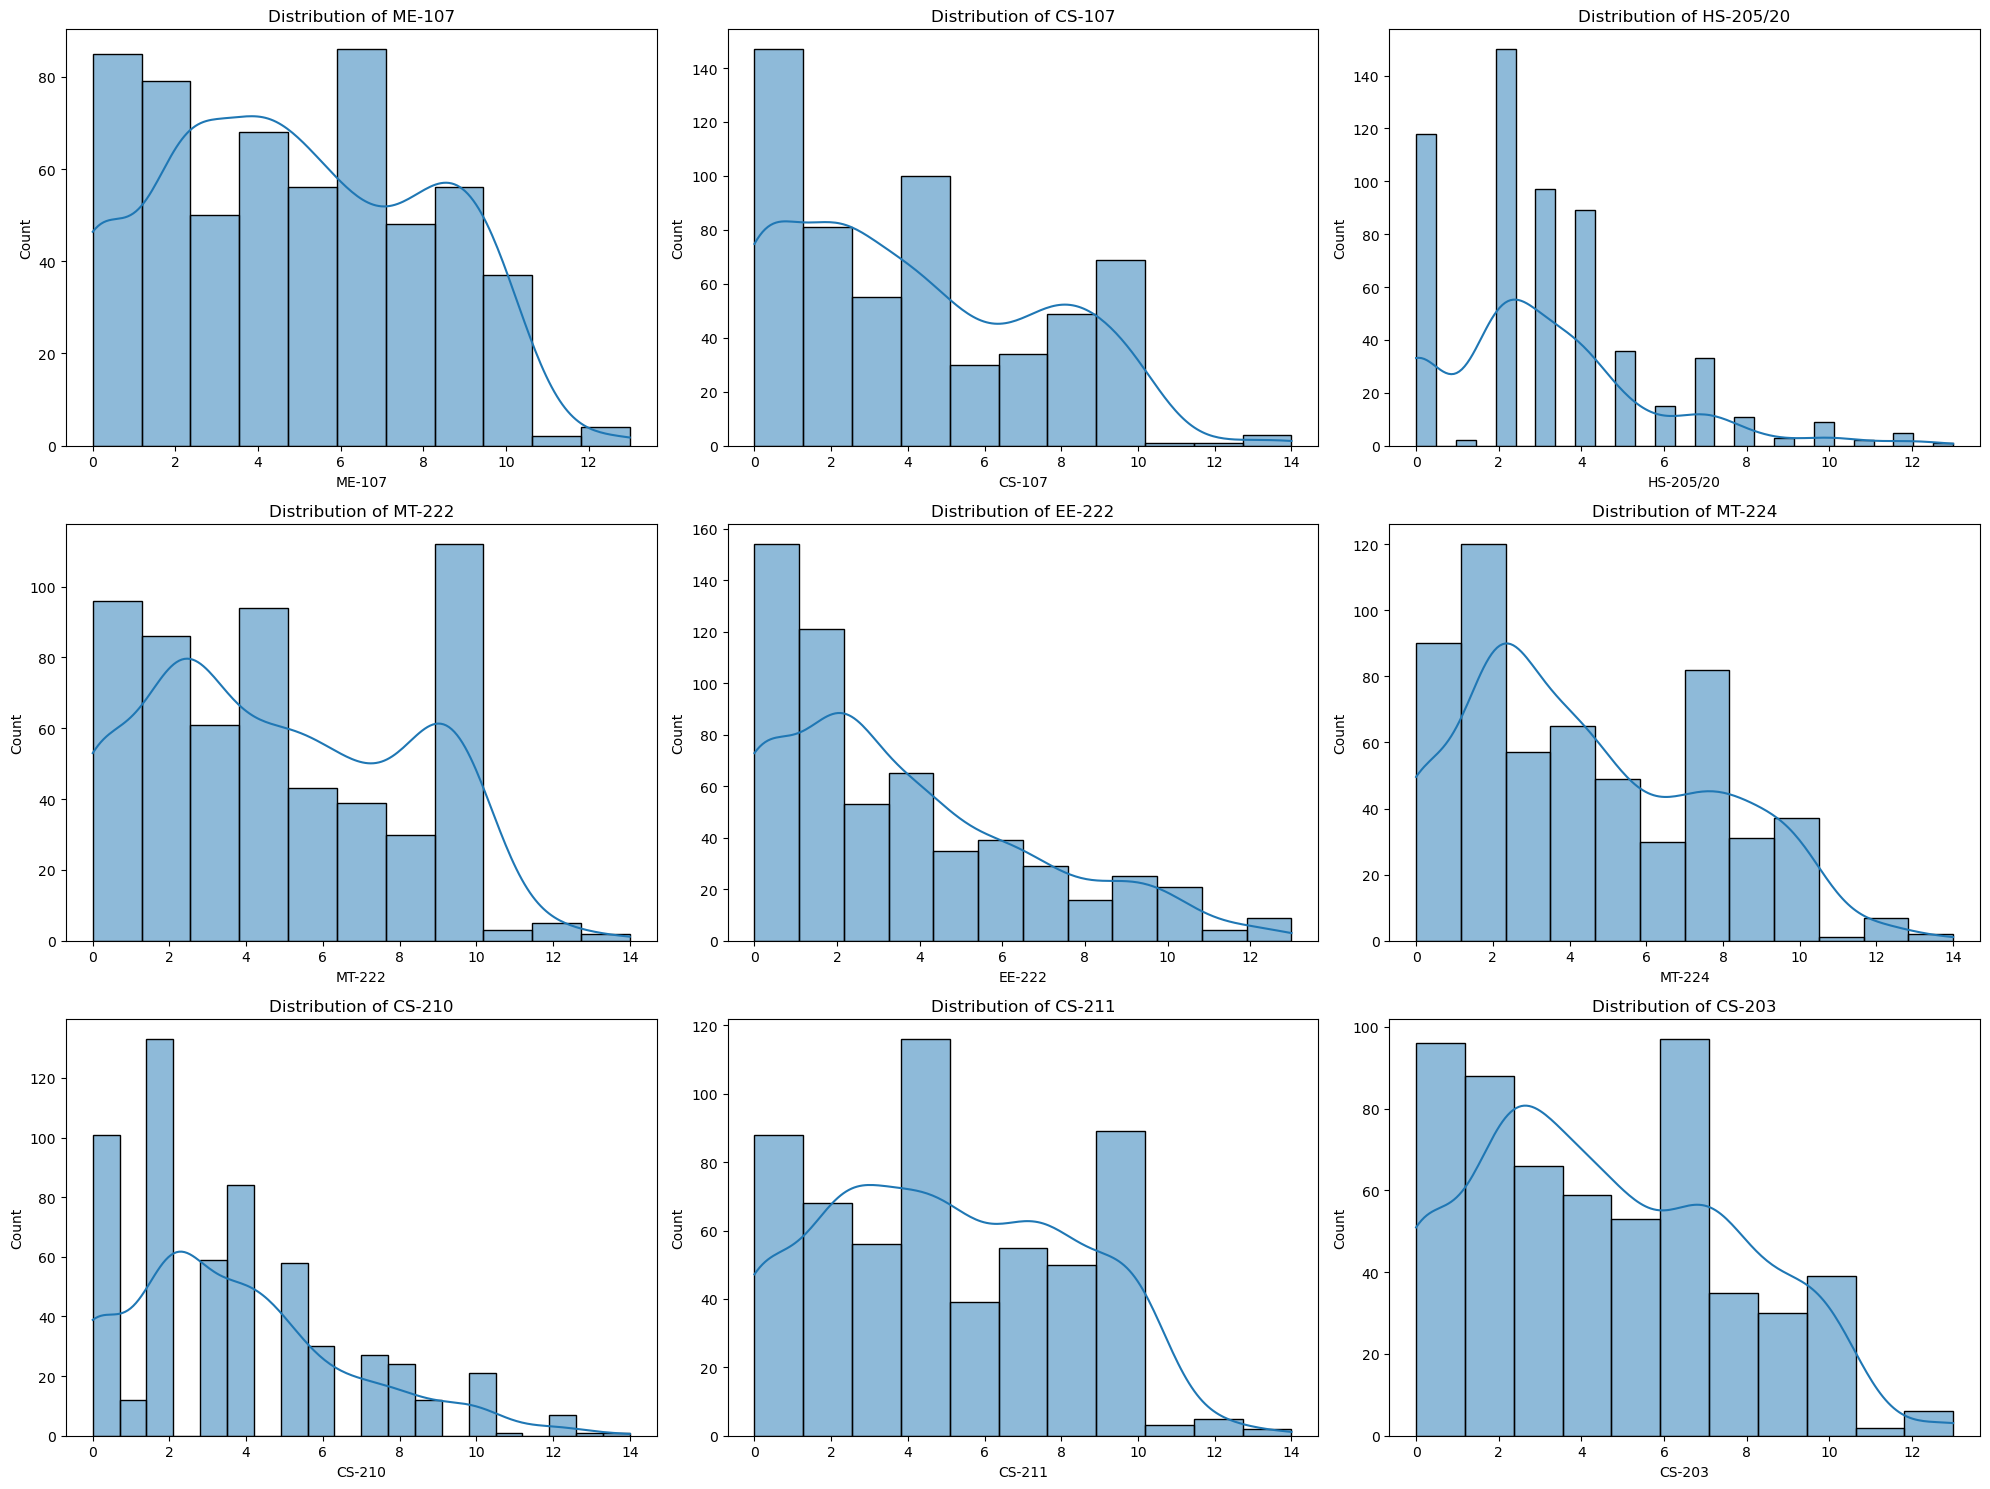

In [55]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns[9:18]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

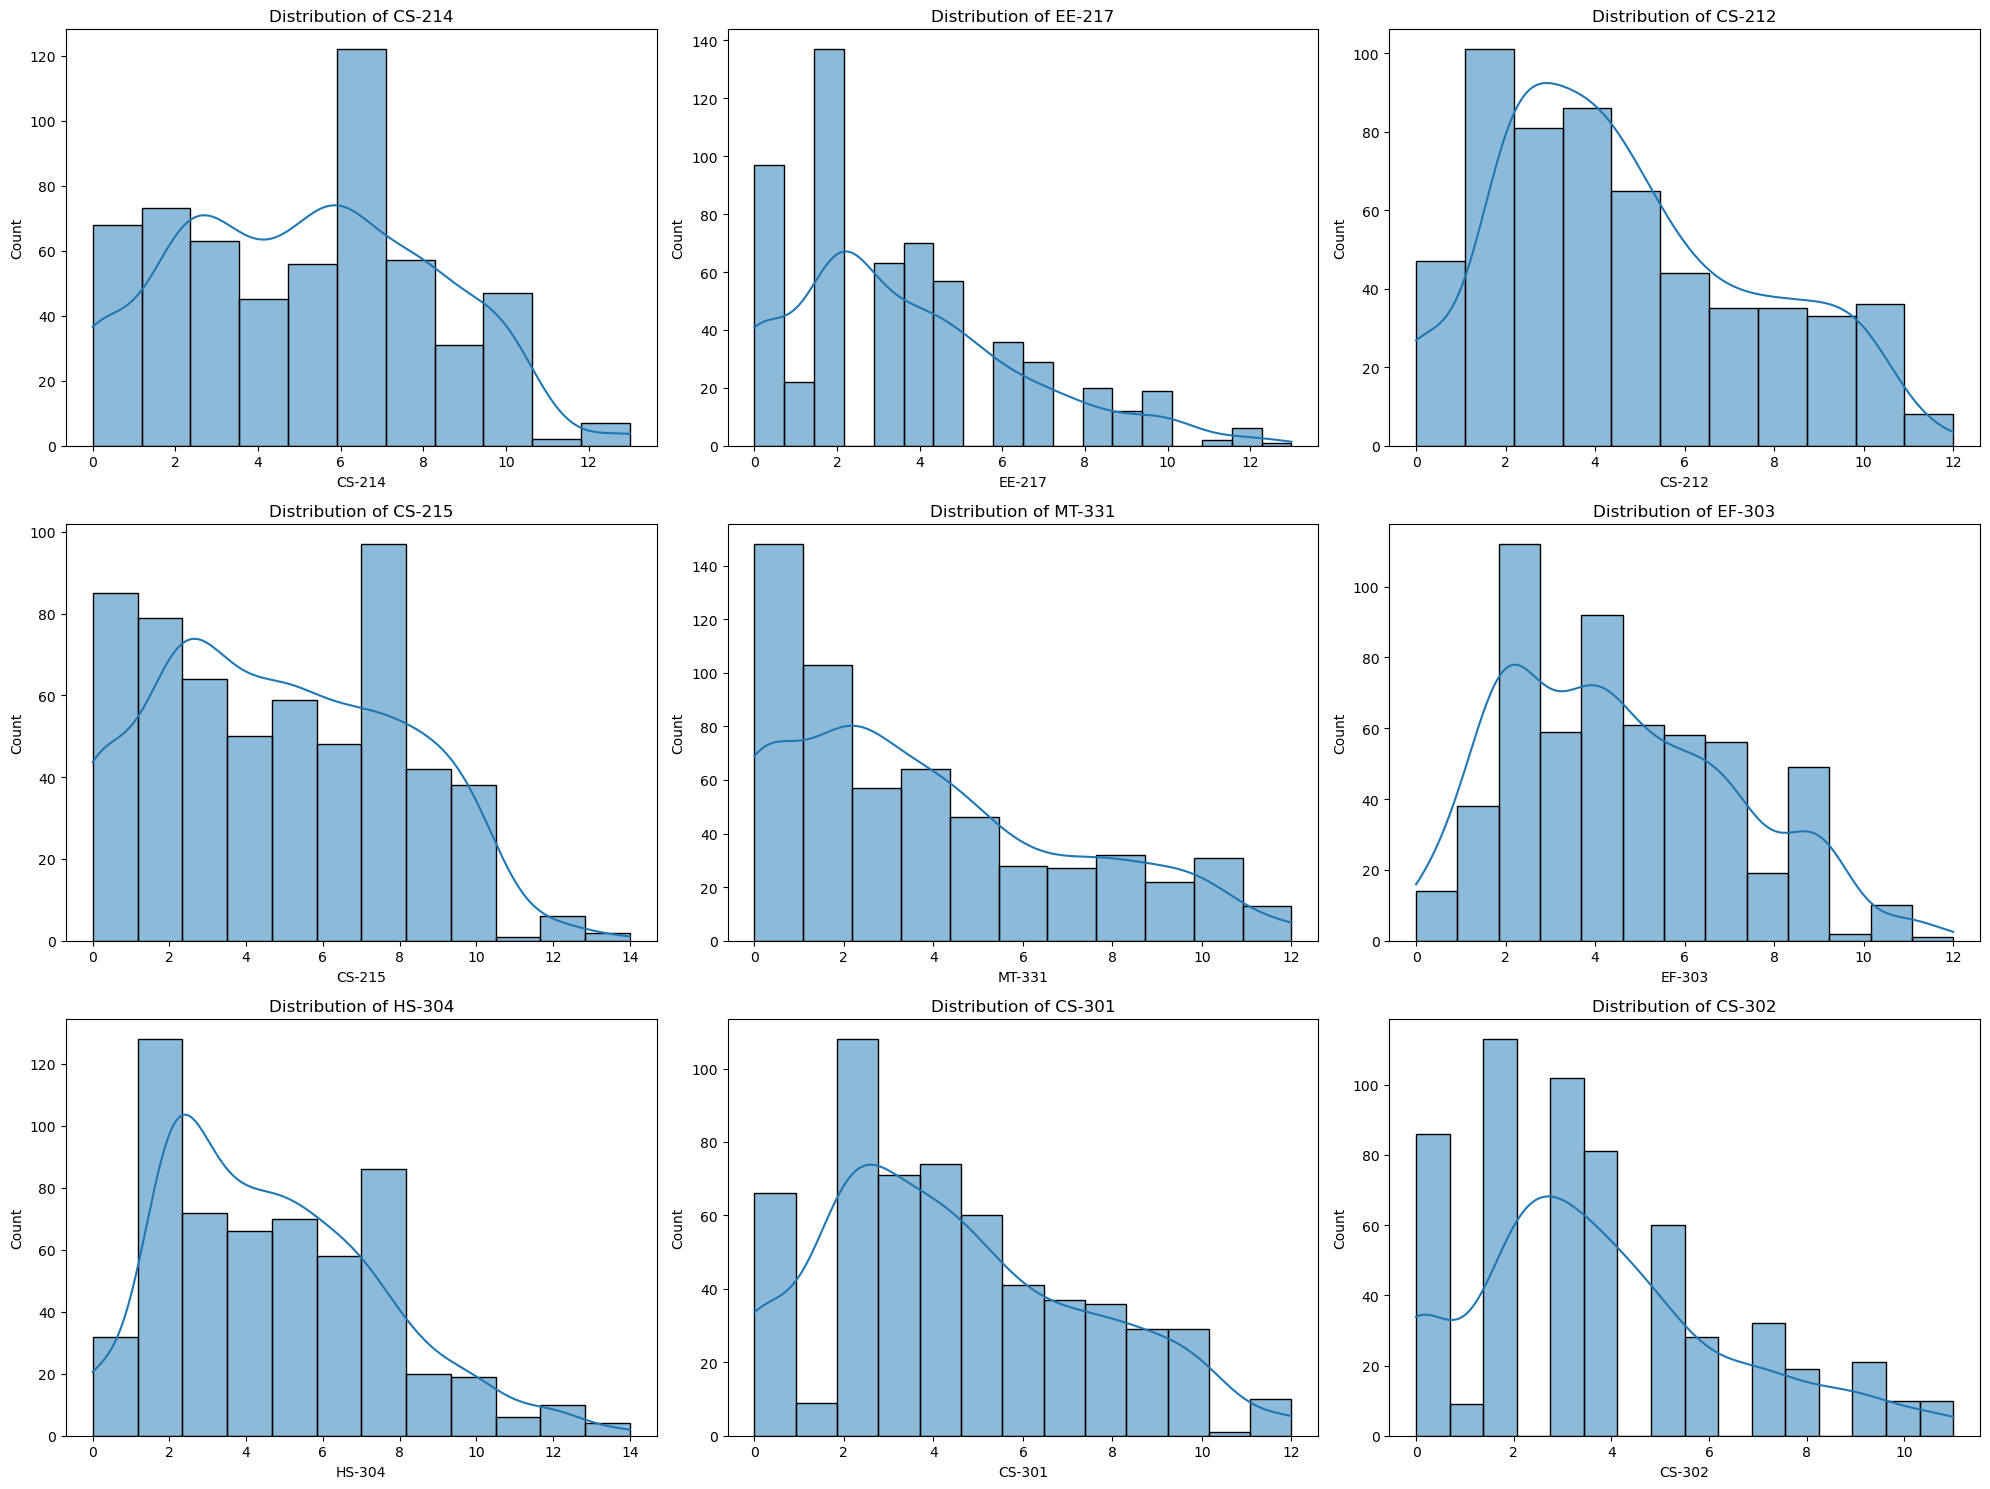

In [56]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns[18:27]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

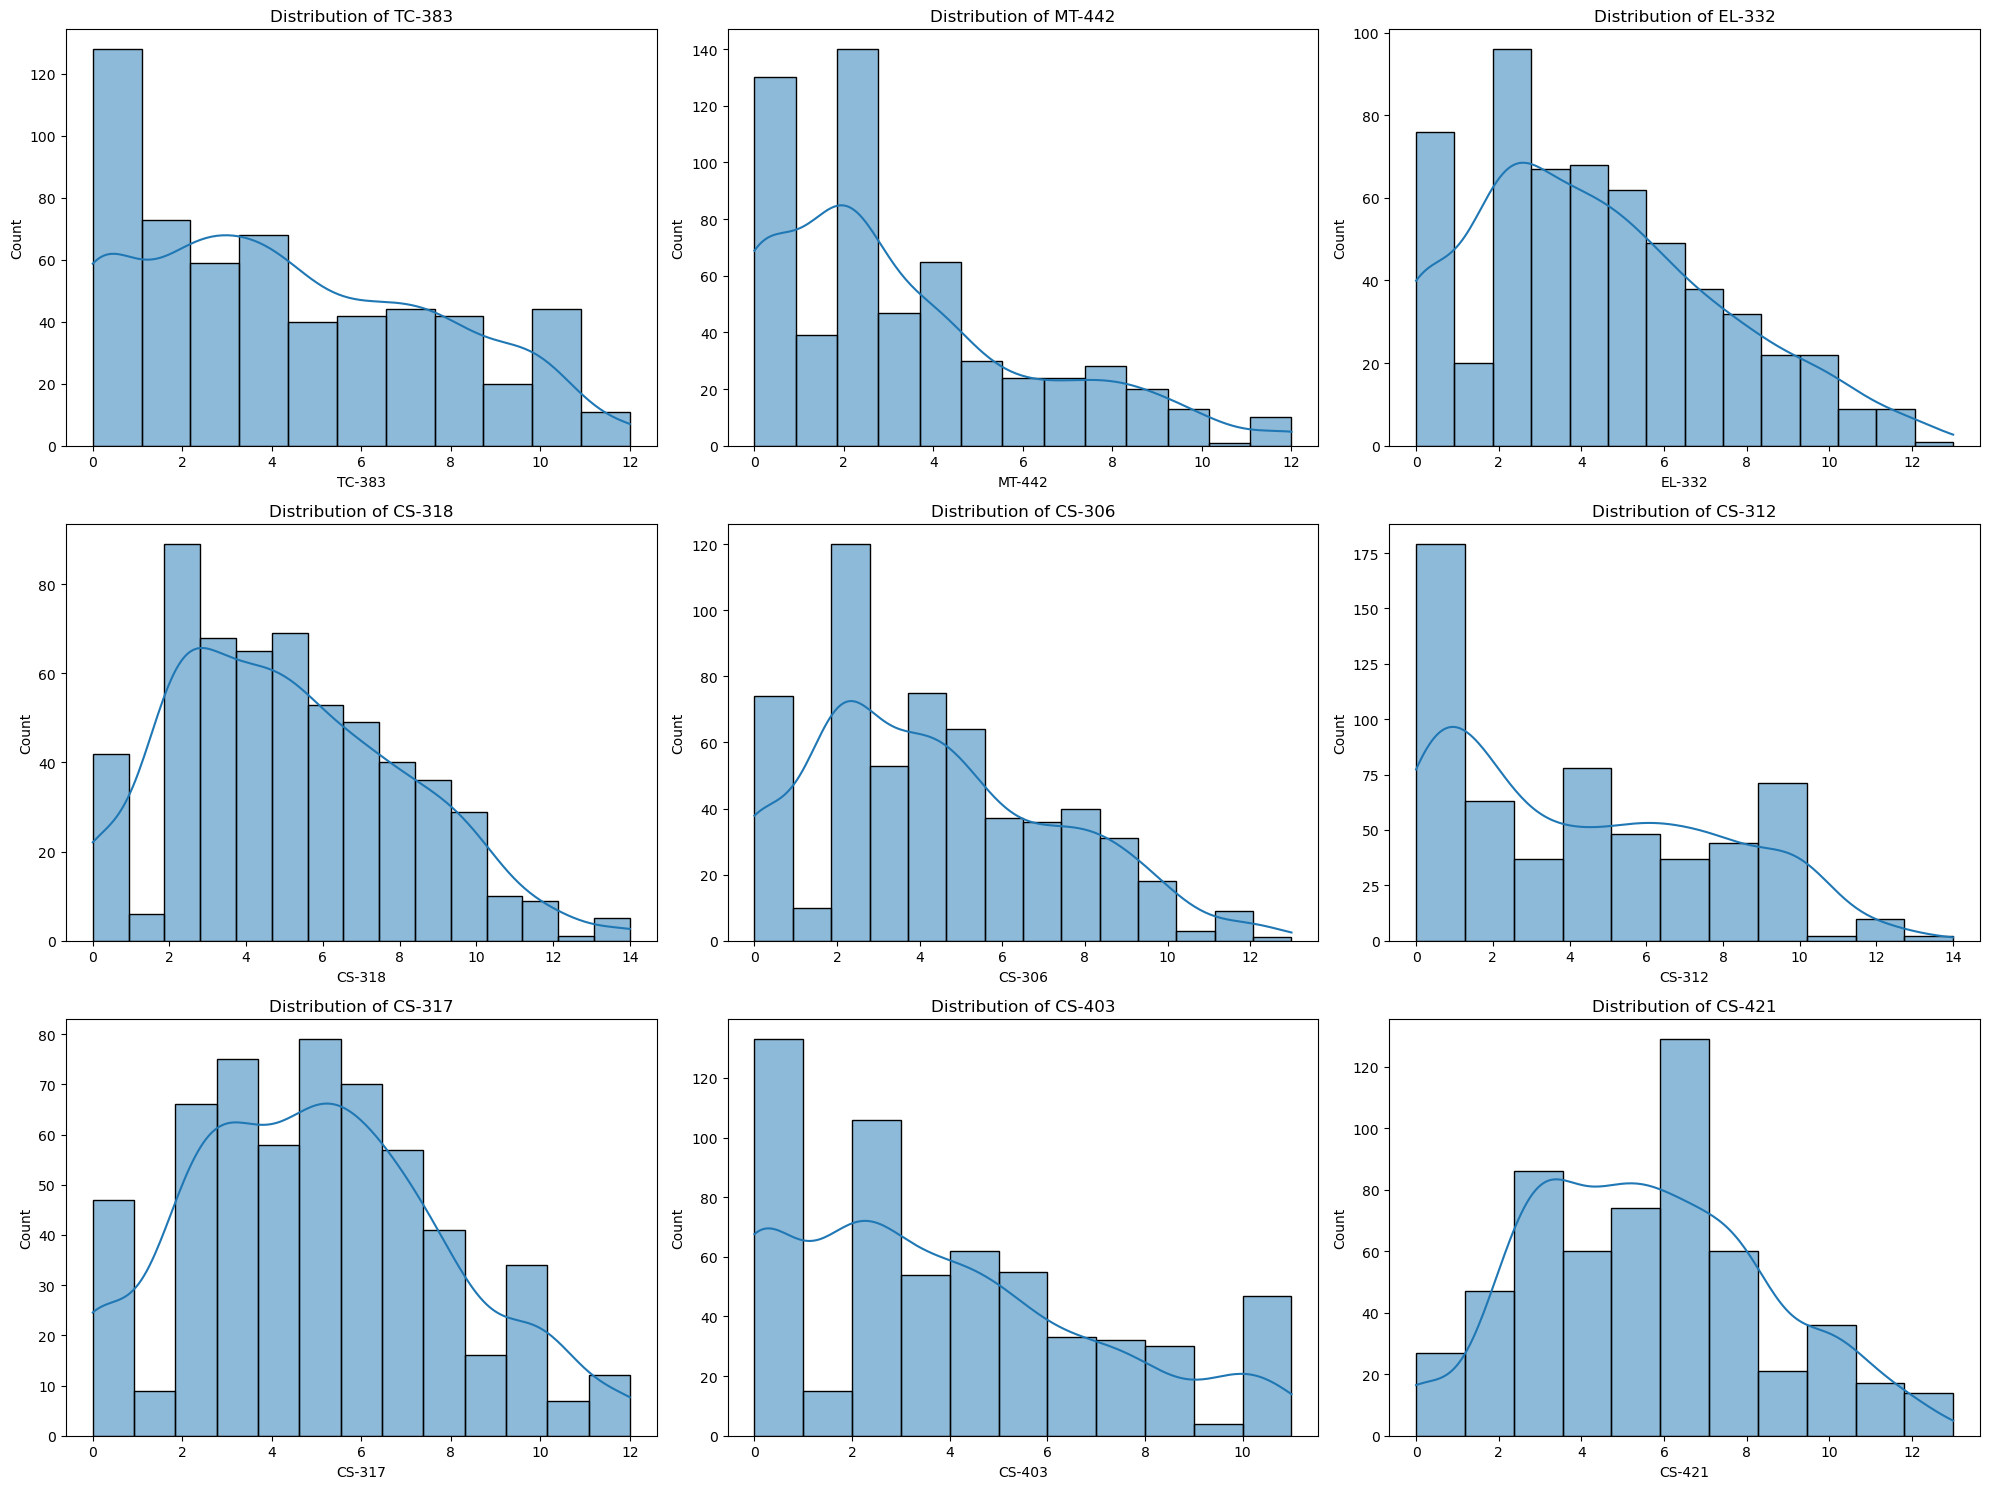

In [57]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns[27:36]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

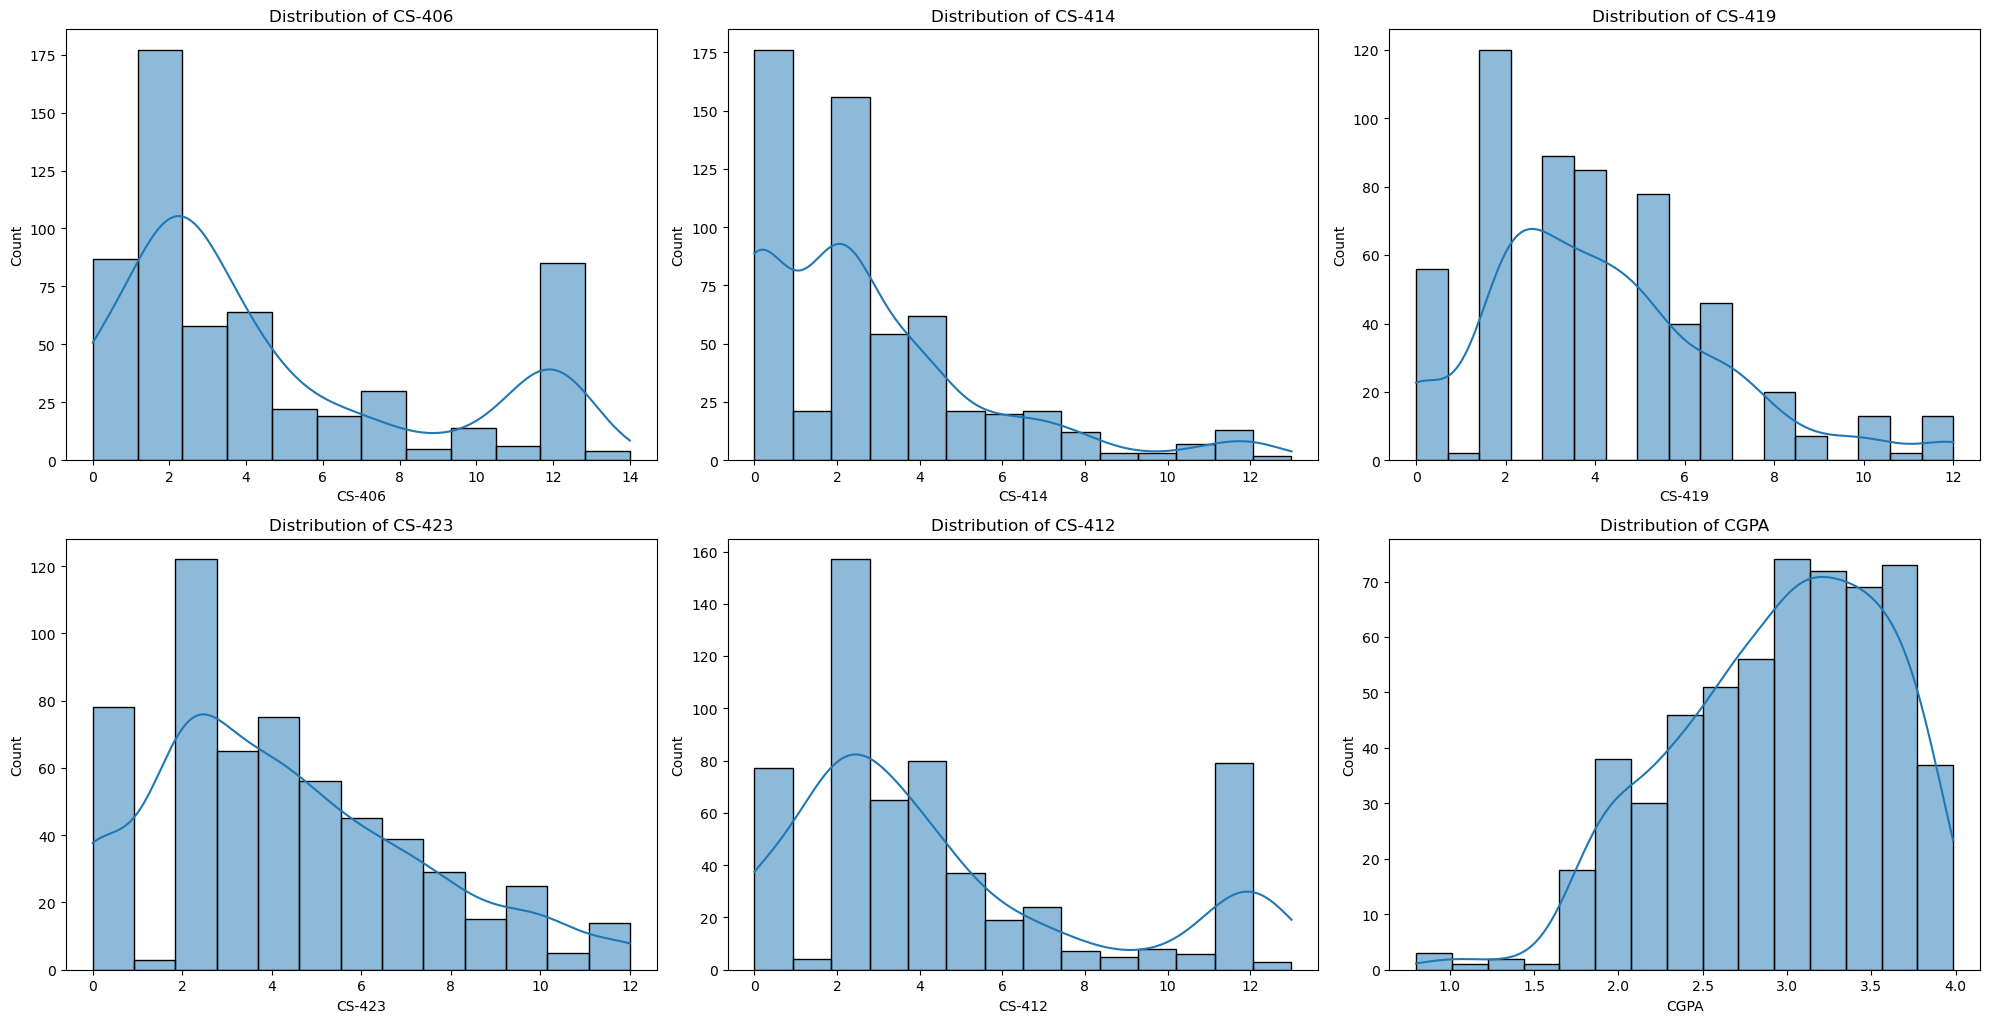

In [58]:
plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns[36:45]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [59]:
x=df.drop("CGPA",axis=1)
y=df["CGPA"]

In [60]:
x1=df.drop("CGPA",axis=1)
y1=df["CGPA"]

In [61]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.691314,0.538758,1.337952,2.657832,1.745703,1.299509,0.401575,1.001811,...,0.576224,1.066509,1.031780,1.387194,0.843387,-0.621172,-0.933969,1.475118,-0.398941,-0.639470
1,-1.242052,1.411559,2.357802,1.470972,0.350059,1.173242,1.745703,-1.299509,2.259753,1.316634,...,1.573266,1.638050,1.373711,0.747382,1.191596,-0.621172,0.812254,0.721726,0.588612,-0.377159
2,-1.242052,-0.744483,-0.974636,0.228020,0.020761,-1.053643,0.302639,0.000000,-0.713332,-0.887129,...,-0.753165,-0.362343,-0.677873,-1.172056,0.146968,-1.122146,-0.933969,-1.538450,-0.728126,-1.164093
3,1.714365,0.692879,2.357802,1.470972,1.667250,-0.311348,2.106468,1.299509,1.888117,0.686988,...,1.240919,1.638050,0.347919,2.027007,0.843387,0.130288,0.113764,1.098422,0.917796,0.672087
4,-0.585070,-1.103823,-0.308148,-0.082718,-1.296430,-1.053643,-0.779659,0.000000,-1.456603,-0.887129,...,-0.753165,0.209198,-0.335942,0.107569,-0.201242,-0.621172,-0.933969,-0.785058,-0.728126,-1.164093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.974636,-0.704194,-0.967132,-1.053643,-0.779659,-0.649755,-1.084968,-0.257482,...,-0.088471,-0.648113,-1.019804,-1.172056,-1.942290,-1.122146,0.463009,-0.031666,-0.398941,-1.164093
567,-0.913561,-1.822504,-0.974636,-1.325670,-1.296430,-1.053643,-1.501191,-0.649755,-1.456603,-1.516776,...,-0.753165,-0.076572,-0.335942,-1.172056,-1.942290,-0.621172,0.113764,-0.785058,0.588612,-0.639470
568,-0.256579,-1.822504,-0.308148,-0.082718,-1.296430,-1.053643,-1.501191,-1.299509,-1.456603,-0.572306,...,-0.088471,-0.648113,-0.677873,-1.172056,-0.549452,-1.122146,1.161498,-0.031666,-0.728126,-0.639470
569,-1.242052,-0.385142,2.024558,-1.325670,1.667250,2.657832,0.302639,1.299509,0.401575,1.001811,...,-0.088471,1.352280,-0.677873,-0.212337,0.843387,1.132236,1.161498,-0.408362,0.259427,0.409775


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,3.102195,PH-121
1,1.799416,HS-101
2,2.638303,CY-105
3,2.327673,HS-105/12
4,2.732960,MT-111
5,2.459240,CS-105
6,2.061174,CS-106
7,2.177565,EL-102
8,2.163668,EE-119
9,2.397521,ME-107


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


#Finding best Random state
maxR2S=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score>maxR2S:
        maxR2S=r2score
        maxRS=i
print('Best accuracy is',maxR2S,'on Random_state',maxRS)

Best accuracy is 0.9731155000306492 on Random_state 471


In [66]:
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predlr))
print("Mean absolute error:", mean_absolute_error(y_test, predlr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predlr)))

error:
Mean squared error: 0.01588069798990517
Mean absolute error: 0.09481880098488428
Root Mean squared error: 0.126018641438103


In [67]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=471)

In [68]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predlr))
print("Mean absolute error:", mean_absolute_error(y_test, predlr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predlr)))
print(r2_score(y_test, predlr))

error:
Mean squared error: 0.01089512727596017
Mean absolute error: 0.07532625058885949
Root Mean squared error: 0.1043797263646546
0.97364118028344


In [83]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [72]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predrfr))
print("Mean absolute error:", mean_absolute_error(y_test, predrfr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predrfr)))
print(r2_score(y_test, predrfr))

error:
Mean squared error: 0.020218805026956506
Mean absolute error: 0.10611799999999992
Root Mean squared error: 0.1421928444998429
0.9510842027733123


In [73]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predknr))
print("Mean absolute error:", mean_absolute_error(y_test, predknr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predknr)))
print(r2_score(y_test, predknr))

error:
Mean squared error: 0.016589775652173913
Mean absolute error: 0.09413391304347826
Root Mean squared error: 0.12880130299097875
0.959863992913723


In [74]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, preddtr))
print("Mean absolute error:", mean_absolute_error(y_test, preddtr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, preddtr)))
print(r2_score(y_test, preddtr))

error:
Mean squared error: 0.07488255652173914
Mean absolute error: 0.20674782608695655
Root Mean squared error: 0.2736467732711993
0.8188349931783905


In [76]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
predabr=abr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predabr))
print("Mean absolute error:", mean_absolute_error(y_test, predabr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predabr)))
print(r2_score(y_test, predabr))

error:
Mean squared error: 0.03136208403633554
Mean absolute error: 0.1469233032676107
Root Mean squared error: 0.17709343306948322
0.9241250241405264


In [77]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predgbr))
print("Mean absolute error:", mean_absolute_error(y_test, predgbr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predgbr)))
print(r2_score(y_test, predgbr))

error:
Mean squared error: 0.014152554156869413
Mean absolute error: 0.08573677449349403
Root Mean squared error: 0.11896450797136687
0.9657604161841336


In [78]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    predsvr=svr.predict(x_test)
    print("error:")
    print("Mean squared error:", mean_squared_error(y_test, predsvr))
    print("Mean absolute error:", mean_absolute_error(y_test, predsvr))
    print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predsvr)))
    print(r2_score(y_test, predsvr))
    print("-------------------------------------------")

error:
Mean squared error: 0.008520317735256064
Mean absolute error: 0.05713189619992147
Root Mean squared error: 0.09230556719535428
0.9793866089470139
-------------------------------------------
error:
Mean squared error: 0.03608786694037302
Mean absolute error: 0.14310969541903562
Root Mean squared error: 0.1899680682124578
0.9126918341986359
-------------------------------------------
error:
Mean squared error: 0.016198104925248376
Mean absolute error: 0.07708558932054094
Root Mean squared error: 0.1272717758391403
0.9608115704699819
-------------------------------------------


In [80]:
lasso=Lasso(alpha=.0001)
lasso.fit(x_train,y_train)
print(lasso.score(x_train,y_train))
predlasso=lasso.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predlasso))
print("Mean absolute error:", mean_absolute_error(y_test, predlasso))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predlasso)))


0.9487894364432263
error:
Mean squared error: 0.01084065911664963
Mean absolute error: 0.07502094548159557
Root Mean squared error: 0.10411848595062084


In [81]:
lasso.coef_

array([-0.02220282, -0.03876753,  0.0035822 , -0.01105588, -0.06014782,
       -0.05519999,  0.00105792, -0.01484075, -0.07913024, -0.03576733,
       -0.01043203,  0.00795078, -0.01471248, -0.00728255, -0.03543525,
       -0.0395135 ,  0.00145126, -0.00734571, -0.02098618, -0.02685124,
       -0.00589837, -0.01439595, -0.01855985,  0.00026468, -0.0097667 ,
       -0.0359558 , -0.03482403, -0.02379254,  0.00188859, -0.03822227,
       -0.00099957, -0.05074166,  0.00385354, -0.04243405, -0.01083739,
       -0.05258684,  0.00583538,  0.00048783, -0.00710161, -0.02239808,
        0.00046333])

In [82]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predrd=rd.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predrd))
print("Mean absolute error:", mean_absolute_error(y_test, predrd))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predrd)))
rd.coef_

0.948791474033639
error:
Mean squared error: 0.010895122987734521
Mean absolute error: 0.07532622803217659
Root Mean squared error: 0.10437970582318443


array([-0.0222434 , -0.03873104,  0.00404886, -0.01100939, -0.06029491,
       -0.05539655,  0.0014297 , -0.01477756, -0.07933124, -0.03580103,
       -0.01061023,  0.00812835, -0.01485973, -0.00746016, -0.03549138,
       -0.03977034,  0.00203975, -0.00739941, -0.02092449, -0.02704732,
       -0.00607767, -0.0144506 , -0.01887817,  0.00058269, -0.00990256,
       -0.03604572, -0.03507902, -0.02393096,  0.00229214, -0.03832056,
       -0.00100913, -0.05083039,  0.00436021, -0.04250389, -0.01086558,
       -0.05288   ,  0.00625904,  0.00095201, -0.00734151, -0.02246304,
        0.00090565])

In [84]:
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
print(enr.score(x_train,y_train))
predenr=enr.predict(x_test)
print("error:")
print("Mean squared error:", mean_squared_error(y_test, predenr))
print("Mean absolute error:", mean_absolute_error(y_test, predenr))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, predenr)))
enr.coef_

0.9487909420779863
error:
Mean squared error: 0.010865962627663043
Mean absolute error: 0.07516628912561048
Root Mean squared error: 0.10423992818331679


array([-0.02223372, -0.03875037,  0.00381053, -0.01103535, -0.06021171,
       -0.05528736,  0.00124629, -0.01481344, -0.07922022, -0.03577918,
       -0.01050597,  0.00804359, -0.01477579, -0.00735985, -0.03544391,
       -0.03961579,  0.00174348, -0.00737987, -0.02095076, -0.02694772,
       -0.0059885 , -0.01442951, -0.01871396,  0.00042908, -0.00984007,
       -0.03600001, -0.03496286, -0.02387546,  0.00207332, -0.03828523,
       -0.00101413, -0.05079017,  0.00408824, -0.04247716, -0.01086132,
       -0.0527266 ,  0.00604093,  0.000712  , -0.00722474, -0.02241543,
        0.00068662])

# Cross Validation

In [85]:
sc=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(sc)
print('Cross validation score of linear regression model:',sc.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predlr)-sc.mean())

[0.94838463 0.85818991 0.95452778 0.947025   0.94103725]
Cross validation score of linear regression model: 0.9298329142240458
Difference between accuracy score and cross validation score is 0.04380826605939425


In [86]:
sc1=cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(sc1)
print('Cross validation score of linear regression model:',sc1.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predrfr)-sc1.mean())

[0.95800563 0.87841055 0.95652556 0.945743   0.94175044]
Cross validation score of linear regression model: 0.9360870328581805
Difference between accuracy score and cross validation score is 0.01499716991513178


In [87]:
sc2=cross_val_score(knr,x,y,cv=5,scoring='r2')
print(sc2)
print('Cross validation score of linear regression model:',sc2.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predknr)-sc2.mean())

[0.95436512 0.8685648  0.95664779 0.95765596 0.93864509]
Cross validation score of linear regression model: 0.9351757525303178
Difference between accuracy score and cross validation score is 0.024688240383405224


In [88]:
sc3=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(sc3)
print('Cross validation score of linear regression model:',sc3.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, preddtr)-sc3.mean())

[0.82556553 0.74388013 0.85855878 0.78034848 0.7533133 ]
Cross validation score of linear regression model: 0.7923332430019026
Difference between accuracy score and cross validation score is 0.026501750176487926


In [89]:
sc4=cross_val_score(abr,x,y,cv=5,scoring='r2')
print(sc4)
print('Cross validation score of linear regression model:',sc4.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predabr)-sc4.mean())

[0.91918511 0.87664204 0.9282463  0.91382874 0.89208644]
Cross validation score of linear regression model: 0.9059977240952198
Difference between accuracy score and cross validation score is 0.018127300045306605


In [90]:
sc5=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(sc5)
print('Cross validation score of linear regression model:',sc5.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predgbr)-sc5.mean())

[0.95876449 0.91603066 0.96156029 0.96106212 0.95691364]
Cross validation score of linear regression model: 0.9508662384273308
Difference between accuracy score and cross validation score is 0.014894177756802796


In [91]:
sc6=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(sc6)
print('Cross validation score of linear regression model:',sc6.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predsvr)-sc6.mean())

[0.9732278  0.94936471 0.96831752 0.96140417 0.95609897]
Cross validation score of linear regression model: 0.9616826359463726
Difference between accuracy score and cross validation score is -0.0008710654763907089


In [92]:
sc7=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(sc7)
print('Cross validation score of linear regression model:',sc7.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predlasso)-sc7.mean())

[0.94843498 0.85825018 0.95471078 0.94738187 0.94120899]
Cross validation score of linear regression model: 0.9299973595400031
Difference between accuracy score and cross validation score is 0.04377559675258258


In [93]:
sc8=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(sc8)
print('Cross validation score of linear regression model:',sc8.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predrd)-sc8.mean())

[0.94838463 0.8581899  0.9545278  0.94702503 0.94103728]
Cross validation score of linear regression model: 0.9298329276071984
Difference between accuracy score and cross validation score is 0.043808263050839846


In [94]:
sc9=cross_val_score(enr,x,y,cv=5,scoring='r2')
print(sc9)
print('Cross validation score of linear regression model:',sc9.mean())
print("Difference between accuracy score and cross validation score is", r2_score(y_test, predenr)-sc9.mean())

[0.94841066 0.85821096 0.95462284 0.94721111 0.94113789]
Cross validation score of linear regression model: 0.9299186919647336
Difference between accuracy score and cross validation score is 0.0437930469902198


The best model is Support Vector Regressor Model.
The difference is less in Support Vector Regressor ,so it is the best model.

In [96]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [97]:
#Creating parameters list to pass in GridSearchCV
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.9619622642546062


In [99]:
model=SVR(kernel='rbf',C=10)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("R2_score:",r2_score(y_test, pred))
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean absolute error:", mean_absolute_error(y_test, pred))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.9627246227872
Mean squared error: 0.015407365859319452
Mean absolute error: 0.07521022997118114
Root Mean squared error: 0.12412641080495099


In [102]:
import pickle
filename='student_grades_linearregression.pkl'
pickle.dump(model,open(filename,'wb'))

In [103]:
loaded_model=pickle.load(open('student_grades_linearregression.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

96.27246227872


In [104]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
predicted,2.783483,3.593363,2.77623,3.755262,2.00985,3.183902,3.341222,2.242012,3.540381,3.626765,...,3.156832,3.02309,3.495266,2.288359,3.87177,1.95062,2.20745,3.307701,2.589362,3.445347
original,2.793000,3.624000,2.77900,3.868000,1.99200,3.149000,3.345000,2.408000,3.572000,3.576000,...,3.167000,3.07500,3.566000,2.414000,3.97000,1.99600,2.19100,3.386000,2.579000,3.396000
